In [ ]:
!pip install geopandas
!pip install geovoronoi
!pip install contextily
!pip install descartes

In [ ]:
!pip install geovoronoi==0.2.0


PackagesNotFoundError: The following packages are not available from current channels:

  - geovoronoi==0.1.2

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
!conda install Shapely==1.7.1

In [ ]:
from shapely.ops import cascaded_union

In [ ]:
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
gdf = gpd.read_file("data/所有監測站點位.shp")
gdf.head()

,ID,station_na,x,y,geometry
0,11D5D57,D01_衛民街,120.211760,22.992550,POINT (169189.500 2543675.304)
1,11D5273,D02_中北拖吊場,120.187500,23.002780,POINT (166708.523 2544821.753)
2,11D4C28,D03_府安河堤道路,120.156797,23.007468,POINT (163563.950 2545358.671)
3,11D4A85,D04_工業區本田路,120.152158,23.036031,POINT (163106.641 2548524.541)
4,11D5243,D05_四草大眾路,120.127315,23.157662,POINT (160640.862 2562009.314)


In [ ]:
gdf = gpd.read_file("data/中央氣象局監測站點位.shp")
gdf.head()

,ID,station_na,x,y,geometry
0,467410,臺南,120.2047,22.9932,POINT (168466.066 2543751.192)
1,467420,永康,120.2367,23.0383,POINT (171772.851 2548728.135)
2,C0O950,安南,120.1448,23.0766,POINT (162378.772 2553021.633)
3,C0O980,新市,120.2981,23.0616,POINT (178078.064 2551276.874)
4,C0O990,媽廟,120.2935,22.9917,POINT (177569.360 2543538.474)


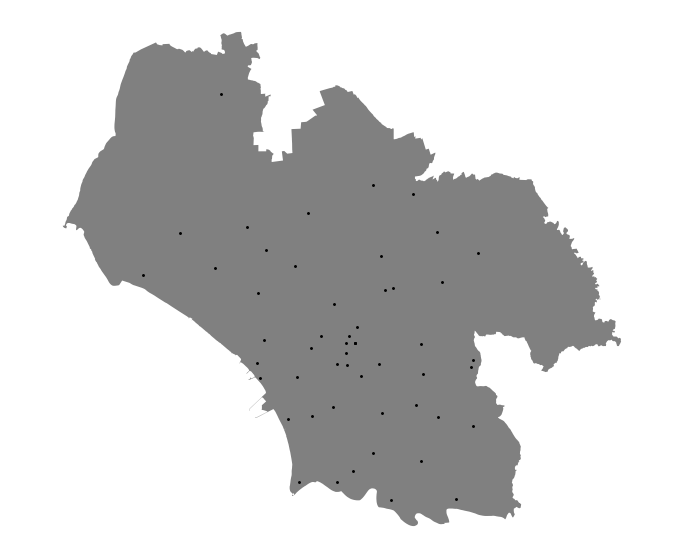

In [ ]:
boundary = gpd.read_file("data/study domain.shp")
fig, ax = plt.subplots(figsize=(12, 10))
boundary.plot(ax=ax, color="gray")
gdf.plot(ax=ax, markersize=3.5, color="black")
ax.axis("off")
plt.axis('equal')
plt.show()

In [ ]:
boundary = boundary.to_crs(epsg=3395)
gdf_proj = gdf.to_crs(boundary.crs)

In [ ]:
boundary_shape = cascaded_union(boundary.geometry)
coords = points_to_coords(gdf_proj.geometry)

In [ ]:
# Calculate Voronoi Regions
#poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape)
poly_shapes, pts = voronoi_regions_from_coords(coords, boundary_shape)

In [ ]:
import matplotlib.pyplot as plt
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

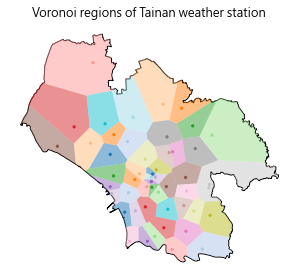

In [ ]:
fig, ax = subplot_for_map()
#plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, pts, poly_to_pt_assignments)
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, coords, pts)
ax.set_title('Voronoi regions of Tainan weather station')
plt.tight_layout()
plt.show()

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

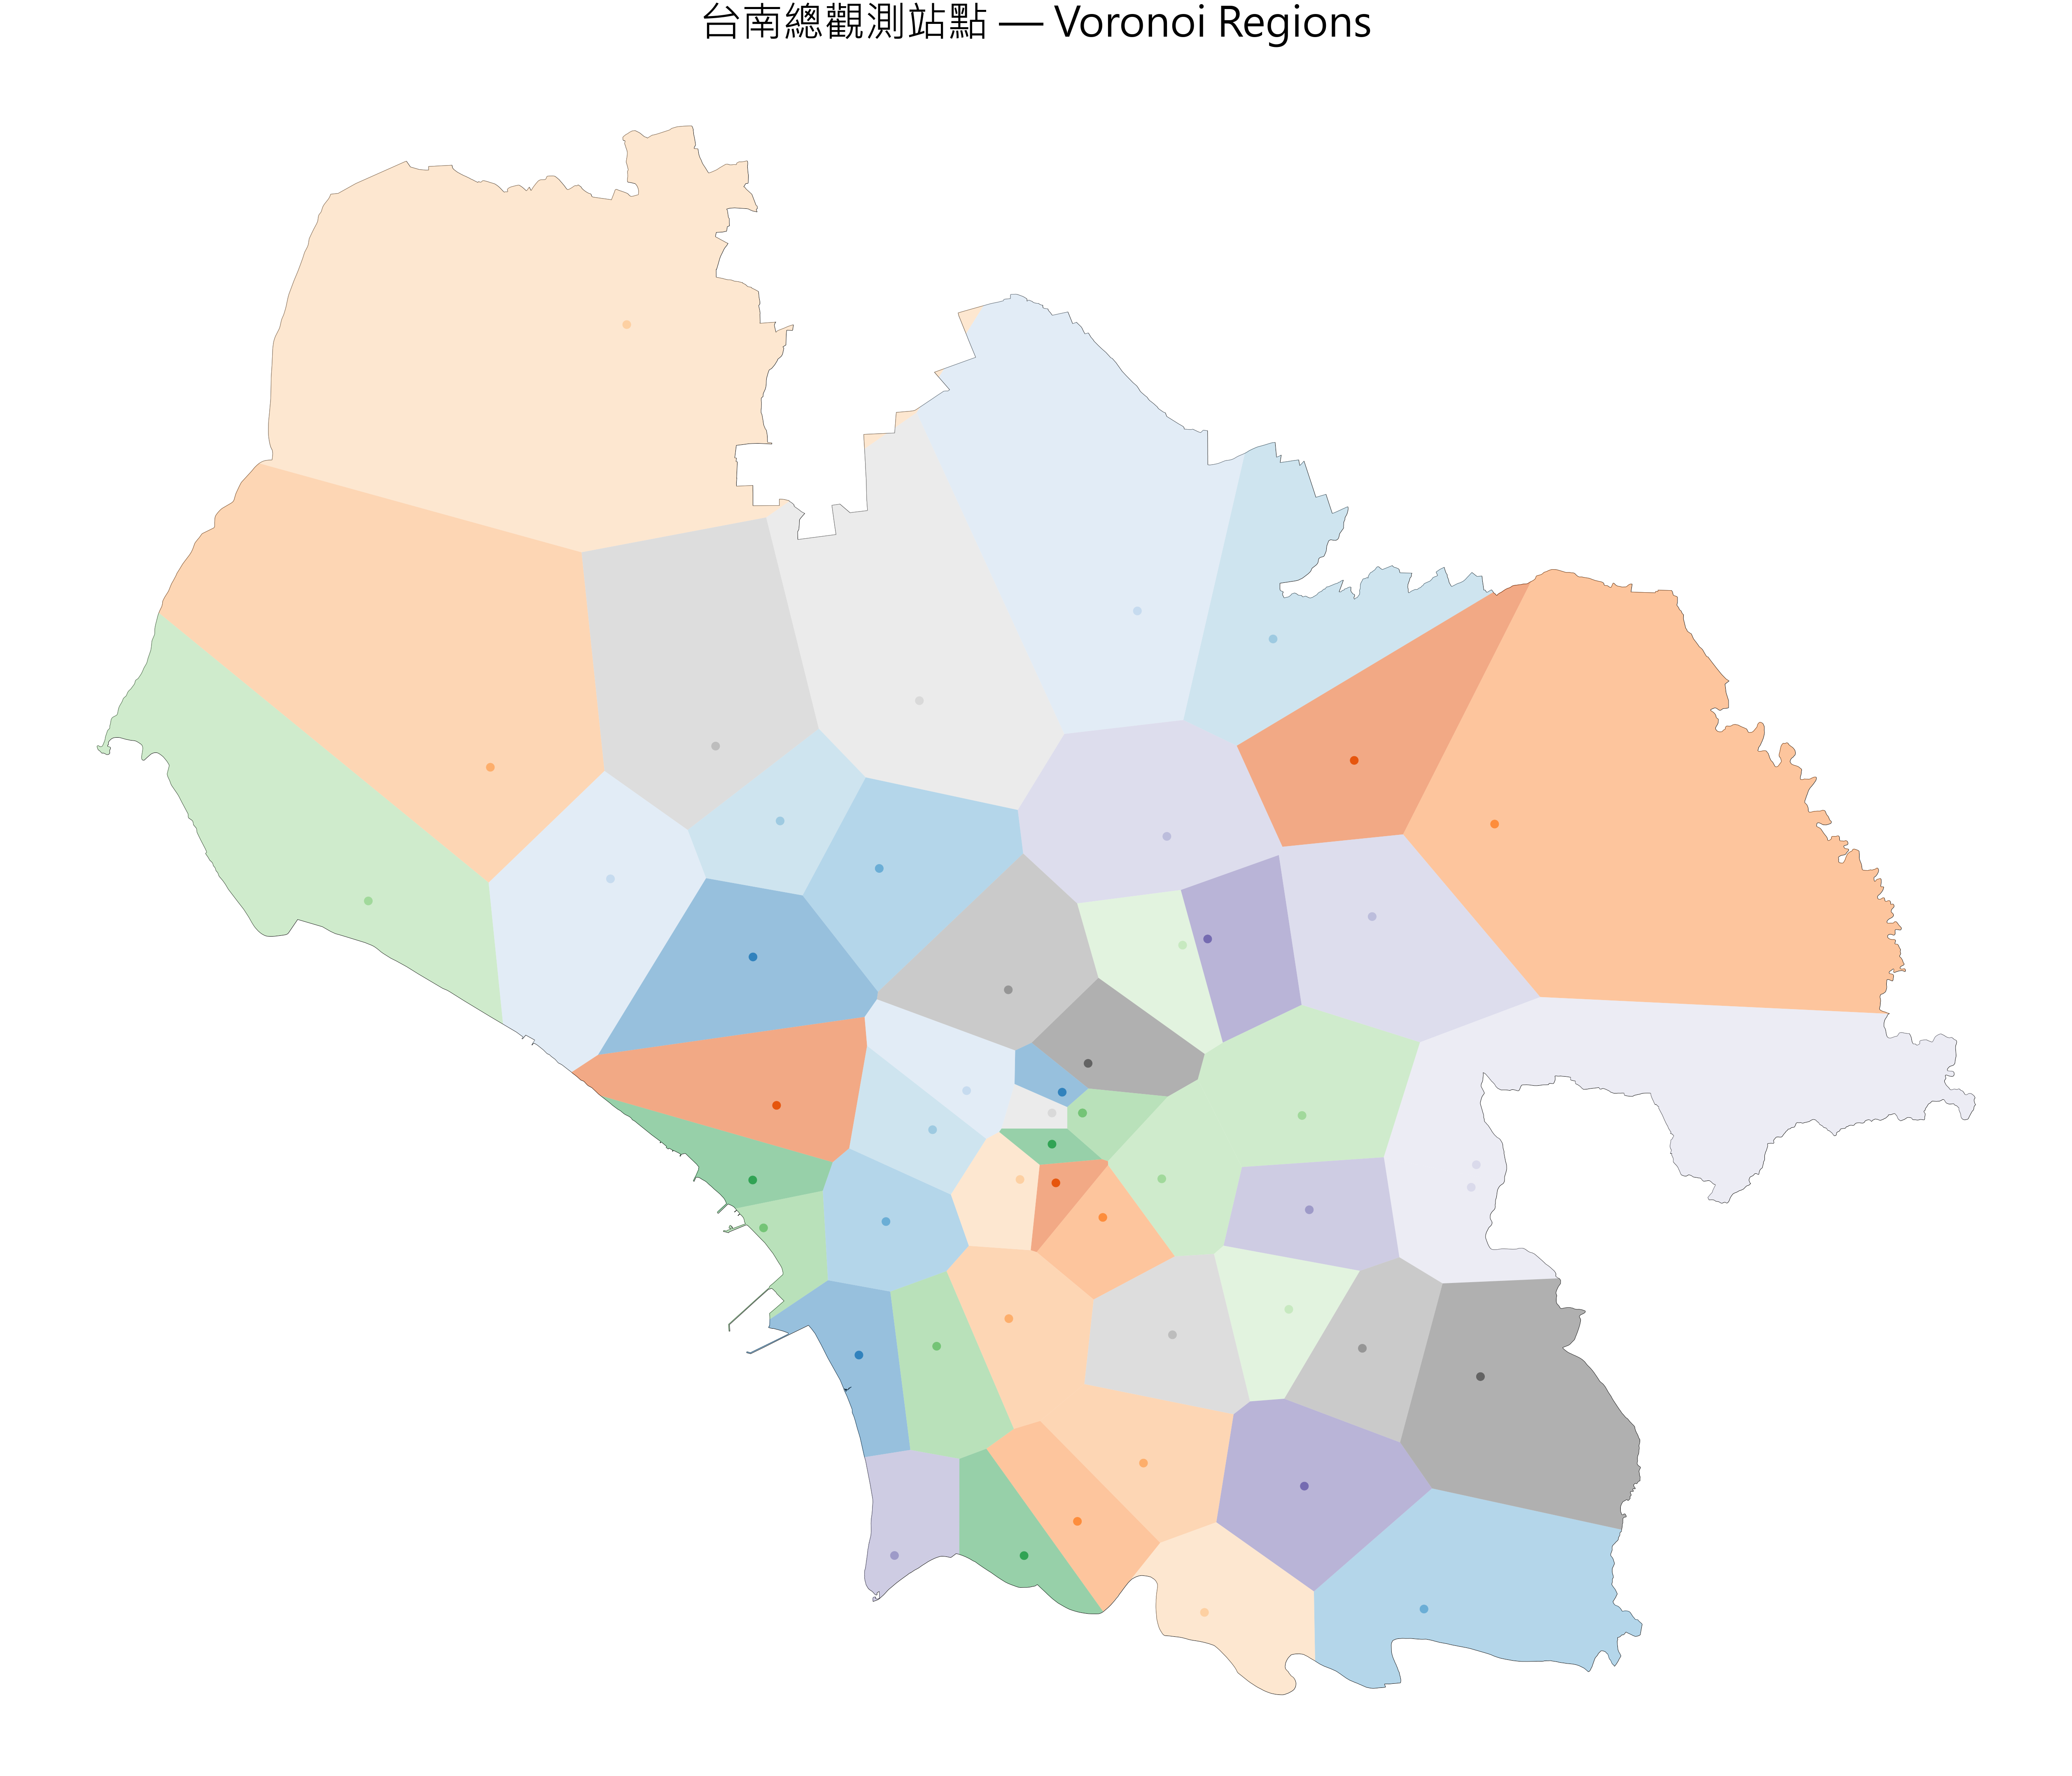

In [ ]:
fig, ax = plt.subplots(figsize=(70,60))
plot_voronoi_polys_with_points_in_area(ax, boundary_shape, poly_shapes, coords , pts,
 voronoi_and_points_cmap='tab20c',
 points_markersize=400)

title='台南總觀測站點 — Voronoi Regions'
#title='中央氣象局觀測站點 — Voronoi Regions'

ax.set_title(title, fontsize=100)
ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
plotfile_fmt = 'C:/Users/Hsieh/Desktop/smart city/output/%s.png'
fig.savefig(plotfile_fmt % '台南總觀測站點 — Voronoi Regions')

In [ ]:
plotfile_fmt = 'C:/Users/Hsieh/Desktop/smart city/output/%s.jpg'
fig.savefig(plotfile_fmt % title)